In [11]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)

df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
difference = np.diff(light_column)
df3['Light2'] = np.append(difference, np.nan)

lights_on = df3.loc[df3.Light2 == -1]
# display(lights_on)

index = lights_on.index 
index_list = index.to_numpy()

filering_spiders = df3.filter(like="Sp")
meanmov_spiders = filering_spiders.mean(axis=1)  
df3['meanmov'] = meanmov_spiders
display(df3)

dfx = df3.iloc[1543:2983]
dfy = df3.iloc[2984:4423]
dfz = df3.iloc[4424:5863]
dfa = df3.iloc[5864:7303]

new_indexes = np.arange(0, 1500, 1)

dfy = dfy.reindex(dfx.index)
dfz = dfz.reindex(dfx.index)
dfa = dfa.reindex(dfx.index)

display(dfx)
display(dfy)
display(dfz)
display(dfa)

df_out = pd.concat([dfx, dfy, dfz, dfa], axis = 1)
display(df_out)

,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,Sp8,Sp9,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov
Index,,,,,,,,,,,,,,,,,,,,,
644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.18750
645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00000
646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.12500
647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00000
648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.31250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.53125
7840,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.03125
7841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00000


,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,Sp8,Sp9,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov
Index,,,,,,,,,,,,,,,,,,,,,
2187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,Sp8,Sp9,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov
Index,,,,,,,,,,,,,,,,,,,,,
2187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,Sp8,Sp9,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov
Index,,,,,,,,,,,,,,,,,,,,,
2187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,Sp8,Sp9,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov
Index,,,,,,,,,,,,,,,,,,,,,
2187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,Sp8,Sp9,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov
Index,,,,,,,,,,,,,,,,,,,,,
2187,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3623,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3624,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# difference = np.diff(light_column)
# df3['Light2'] = np.append(difference, np.nan)

# lights_on = df3.loc[df3.Light2 == -1]
# # display(lights_on)

# index = lights_on.index 
# index_list = index.to_numpy()

# filering_spiders = df3.filter(like="Sp")
# meanmov_spiders = filering_spiders.mean(axis=1)  
# df3['meanmov'] = meanmov_spiders
# display(df3)

df3 = dataframes["df1"]

dfx = df3.iloc[1543:2983]
dfy = df3.iloc[2984:4423]
dfz = df3.iloc[4424:5863]
dfa = df3.iloc[5864:7303]

# new_indexes = np.arange(0, 1500, 1)

dfx = dfx.reset_index(drop=True)
dfy = dfy.reset_index(drop=True)
dfz = dfz.reset_index(drop=True)
dfa = dfa.reset_index(drop=True)

display(dfx)
display(dfy)
display(dfz)
display(dfa)

df_out = pd.concat([dfx, dfy, dfz, dfa], axis = 1)
display(df_out)

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
0,2,2024-01-19 15:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2024-01-19 15:01:00,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2024-01-19 15:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2024-01-19 15:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2024-01-19 15:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,2024-01-20 14:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,3,2024-01-20 14:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,3,2024-01-20 14:57:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,3,2024-01-20 14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
0,3,2024-01-20 15:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2024-01-20 15:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2024-01-20 15:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2024-01-20 15:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2024-01-20 15:05:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,4,2024-01-21 14:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,4,2024-01-21 14:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,4,2024-01-21 14:57:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,4,2024-01-21 14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
0,4,2024-01-21 15:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2024-01-21 15:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2024-01-21 15:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2024-01-21 15:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2024-01-21 15:05:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,5,2024-01-22 14:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,5,2024-01-22 14:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,5,2024-01-22 14:57:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,5,2024-01-22 14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
0,5,2024-01-22 15:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2024-01-22 15:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2024-01-22 15:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,2024-01-22 15:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2024-01-22 15:05:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,6,2024-01-23 14:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,6,2024-01-23 14:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,6,2024-01-23 14:57:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,6,2024-01-23 14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
0,2,2024-01-19 15:00:00,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2024-01-19 15:01:00,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2024-01-19 15:02:00,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2024-01-19 15:03:00,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2024-01-19 15:04:00,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,2024-01-20 14:55:00,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,3,2024-01-20 14:56:00,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,3,2024-01-20 14:57:00,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,3,2024-01-20 14:58:00,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
difference = np.diff(light_column)
df3['Light2'] = np.append(difference, np.nan)

lights_on = df3.loc[df3.Light2 == -1]
# display(lights_on)

index = lights_on.index 
index_list = index.to_numpy()

filering_spiders = df3.filter(like="Sp")
meanmov_spiders = filering_spiders.mean(axis=1)  
df3['meanmov'] = meanmov_spiders
df_out2 = df3.groupby('Light')
display(df_out2)

# Drop 'Day' and 'Time' columns before creating subsets
dfx = df3.iloc[1543:2983]
dfy = df3.iloc[2984:4423]
dfz = df3.iloc[4424:5863]
dfa = df3.iloc[5864:7303]

dfaaa = pd.merge(dfx, dfy, on = "Light", how = "outer") 
display(dfaaa)

df_out = pd.concat([dfx, dfy, dfz, dfa], axis=1, join="outer")
#display(df_out)

,Light,Sp1_x,Sp2_x,Sp3_x,Sp4_x,Sp5_x,Sp6_x,Sp7_x,Sp8_x,Sp9_x,...,Sp25_y,Sp26_y,Sp27_y,Sp28_y,Sp29_y,Sp30_y,Sp31_y,Sp32_y,Light2_y,meanmov_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036078,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1036079,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1036080,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1036081,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [19]:
filering_spiders = df3.filter(like="Sp")
meanmov_spiders = filering_spiders.mean(axis=1)  
meanmov_spiders1 = meanmov_spiders[(721-644):]
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

import pprint
pprint.pprint(list(chunks(meanmov_spiders1, 721)))

[Index
721     0.00000
722     0.00000
723     0.00000
724     0.00000
725     0.00000
         ...   
1437    0.15625
1438    0.00000
1439    0.06250
1440    0.00000
1441    0.25000
Length: 721, dtype: float64,
 Index
1442    0.37500
1443    0.03125
1444    0.00000
1445    0.00000
1446    0.00000
         ...   
2158    0.00000
2159    0.00000
2160    0.00000
2161    0.00000
2162    0.00000
Length: 721, dtype: float64,
 Index
2163    0.0625
2164    0.0000
2165    0.0000
2166    0.0000
2167    0.0000
         ...  
2879    0.0000
2880    0.0000
2881    0.0000
2882    0.0000
2883    0.0000
Length: 721, dtype: float64,
 Index
2884    0.0
2885    0.0
2886    0.0
2887    0.0
2888    0.0
       ... 
3600    0.0
3601    0.0
3602    0.0
3603    0.0
3604    0.0
Length: 721, dtype: float64,
 Index
3605    0.00000
3606    0.00000
3607    0.00000
3608    0.00000
3609    0.00000
         ...   
4321    0.50000
4322    0.09375
4323    0.43750
4324    0.31250
4325    0.31250
Length: 721, dtype: floa

In [24]:
lights_on = df4.loc[df3.Light2 == -1]
display(lights_on)

lights_off = df4.loc[df3.Light2 == 1]
display(lights_off)

index = lights_on.index 
index_list = index.to_numpy()
print(index_list)
mean_mov_arr = df4.meanmov.to_numpy()

matrix = mean_mov_arr[index_list]
matrix = matrix.reshape(len(index_list), -1)
print(matrix)

matrix = []
for i in index_list:
    ztperiod = mean_mov_arr[i]
    ztperiod_list = ztperiod.tolist()
    matrix.append(ztperiod_list)
    
print(matrix)
    

,Day,Time,Light,Light2,meanmov
Index,,,,,
1543,2,2024-01-19 14:59:00,1,-1.0,0.0
2983,3,2024-01-20 14:59:00,1,-1.0,0.0
4423,4,2024-01-21 14:59:00,1,-1.0,0.0
5863,5,2024-01-22 14:59:00,1,-1.0,0.0
7303,6,2024-01-23 14:59:00,1,-1.0,0.0


,Day,Time,Light,Light2,meanmov
Index,,,,,
822,2,2024-01-19 02:58:00,0,1.0,0.3750
2262,3,2024-01-20 02:58:00,0,1.0,0.0625
3702,4,2024-01-21 02:58:00,0,1.0,0.0000
5142,5,2024-01-22 02:58:00,0,1.0,0.0000
6582,6,2024-01-23 02:58:00,0,1.0,0.0000


[1543 2983 4423 5863 7303]


IndexError: index 7303 is out of bounds for axis 0 with size 7200

In [26]:
# Filter DataFrame based on condition
lights_on = df4.loc[df3.Light2 == -1]
display(lights_on)

lights_off = df4.loc[df3.Light2 == 1]
display(lights_off)

# Obtain index list
index = lights_on.index 
index_list = index.to_numpy()
print("Index List:", index_list)

# Check if mean_mov_arr contains the expected values
mean_mov_arr = df4.index
print("Mean Mov Array:", mean_mov_arr)

# Create matrix using a loop
matrix = []
for i in index_list:
    # Check if the index i is within the range of mean_mov_arr
    if i < len(mean_mov_arr):
        ztperiod = mean_mov_arr[i]
        ztperiod_list = ztperiod.tolist()
        matrix.append(ztperiod_list)
    else:
        print(f"Index {i} is out of range.")

# Convert list of lists to NumPy array if needed
matrix = np.array(matrix)
print("Matrix Shape Using Loop:", matrix.shape)
print(matrix)


,Day,Time,Light,Light2,meanmov
Index,,,,,
1543,2,2024-01-19 14:59:00,1,-1.0,0.0
2983,3,2024-01-20 14:59:00,1,-1.0,0.0
4423,4,2024-01-21 14:59:00,1,-1.0,0.0
5863,5,2024-01-22 14:59:00,1,-1.0,0.0
7303,6,2024-01-23 14:59:00,1,-1.0,0.0


,Day,Time,Light,Light2,meanmov
Index,,,,,
822,2,2024-01-19 02:58:00,0,1.0,0.3750
2262,3,2024-01-20 02:58:00,0,1.0,0.0625
3702,4,2024-01-21 02:58:00,0,1.0,0.0000
5142,5,2024-01-22 02:58:00,0,1.0,0.0000
6582,6,2024-01-23 02:58:00,0,1.0,0.0000


Index List: [1543 2983 4423 5863 7303]
Mean Mov Array: Index([ 644,  645,  646,  647,  648,  649,  650,  651,  652,  653,
       ...
       7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843],
      dtype='int64', name='Index', length=7200)
Index 7303 is out of range.
Matrix Shape Using Loop: (4,)
[2187 3627 5067 6507]


In [28]:
lights_on = df4.loc[df4.Light2 == -1]
display(lights_on)

lights_off = df4.loc[df4.Light2 == 1]
display(lights_off)

index = lights_on.index 
index_list = index.to_numpy()
print(index_list)
mean_mov_arr = df4.meanmov.to_numpy()

matrix = mean_mov_arr[index_list]
matrix = matrix.reshape(len(index_list), -1)
print(matrix)

matrix = []
for i in index_list:
    ztperiod = mean_mov_arr[index_list[i]:index_list[i+1]]
    ztperiod_list = ztperiod.tolist()
    matrix.append(ztperiod_list)
    
print(matrix)
    

,Day,Time,Light,Light2,meanmov
Index,,,,,
1543,2,2024-01-19 14:59:00,1,-1.0,0.0
2983,3,2024-01-20 14:59:00,1,-1.0,0.0
4423,4,2024-01-21 14:59:00,1,-1.0,0.0
5863,5,2024-01-22 14:59:00,1,-1.0,0.0
7303,6,2024-01-23 14:59:00,1,-1.0,0.0


,Day,Time,Light,Light2,meanmov
Index,,,,,
822,2,2024-01-19 02:58:00,0,1.0,0.3750
2262,3,2024-01-20 02:58:00,0,1.0,0.0625
3702,4,2024-01-21 02:58:00,0,1.0,0.0000
5142,5,2024-01-22 02:58:00,0,1.0,0.0000
6582,6,2024-01-23 02:58:00,0,1.0,0.0000


[1543 2983 4423 5863 7303]


IndexError: index 7303 is out of bounds for axis 0 with size 7200

In [30]:
lights_on = df4.loc[df4.Light2 == -1]

lights_off = df4.loc[df4.Light2 == 1]

index = lights_on.index 
index_list = index.to_numpy()

mean_mov_arr = df4.meanmov.to_numpy()

matrix = []
max_length = max(len(mean_mov_arr[index_list[i]:index_list[i+1]]) for i in range(len(index_list)-1))
for i in range(len(index_list)):
    # Slice mean_mov_arr based on index ranges
    if i < len(index_list) - 1:
        ztperiod = mean_mov_arr[index_list[i]:index_list[i+1]]
    else:
        # For the last index, slice until the end of mean_mov_arr
        ztperiod = mean_mov_arr[index_list[i]:]
    ztperiod_list = ztperiod.tolist()
    # Pad the list to ensure all lists have the same length
    ztperiod_list += [np.nan] * (max_length - len(ztperiod_list))
    matrix.append(ztperiod_list)

# Convert list of lists to NumPy array
matrix = np.array(matrix)

# Drop lists containing NaN values
matrix = matrix[~np.isnan(matrix).any(axis=1)]
matrix = matrix.reshape(1440, 3)

print(matrix)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


<Axes: >

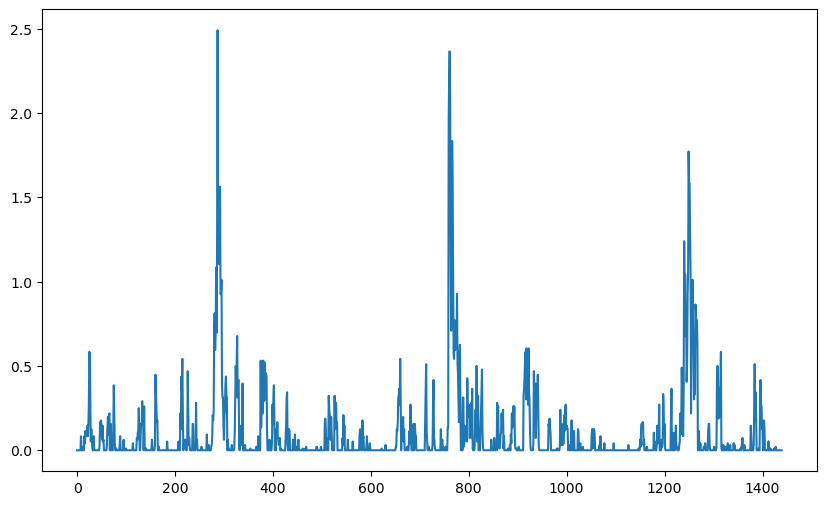

In [32]:
df = pd.DataFrame(matrix)
df['mean'] = df.mean(axis=1)
df


df['mean'].plot(figsize=(10, 6))

In [34]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['Steatoda A masking 02 pm.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)

df_test = dataframes['df1']
spider1 = df_test['Sp1']
display(spider1)


df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-03-20 11:04:00,1,0,0,2,2,15,0,8,...,0,0,2,0,0,0,0,0,0,0
2,1,2024-03-20 11:05:00,1,0,0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2024-03-20 11:06:00,1,0,0,3,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2024-03-20 11:07:00,1,0,0,0,1,3,0,0,...,1,0,1,0,0,0,0,0,0,0
5,1,2024-03-20 11:08:00,1,0,0,0,1,4,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,2024-03-27 10:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10041,8,2024-03-27 10:24:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10042,8,2024-03-27 10:25:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Index
1        0
2        0
3        0
4        0
5        0
        ..
10040    0
10041    0
10042    0
10043    0
10044    0
Name: Sp1, Length: 10044, dtype: int64

In [36]:
df_masking = dataframes['df1']
light_column = df_masking['Light']

difference = np.diff(light_column)
df_masking['Light2'] = np.append(difference, np.nan)

lights_on = df_masking.loc[df_masking.Light2 == -1]
display(lights_on)

lights_off = df_masking.loc[df_masking.Light2 == 1]
display(lights_off)



,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2
Index,,,,,,,,,,,,,,,,,,,,,
535,1,2024-03-20 19:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
1975,2,2024-03-21 19:58:00,1,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,-1.0
3415,3,2024-03-22 19:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
4855,4,2024-03-23 19:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
5959,5,2024-03-24 14:22:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
6295,5,2024-03-24 19:58:00,1,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
7735,6,2024-03-25 19:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
9175,7,2024-03-26 19:58:00,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2
Index,,,,,,,,,,,,,,,,,,,,,
1254,2,2024-03-21 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2694,3,2024-03-22 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4134,4,2024-03-23 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5574,5,2024-03-24 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
6082,5,2024-03-24 16:25:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
7014,6,2024-03-25 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
8454,7,2024-03-26 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9894,8,2024-03-27 07:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [38]:
def datetime_to_zeitgeber(datetime_series, lights_on, lights_off):
    """
    Convert a pandas series of datetime to Zeitgeber time.
    
    Parameters:
    - datetime_series: pandas Series of datetime
    - lights_on: time (e.g., datetime.time(6, 0)) when lights turn on (ZT0)
    - lights_off: time (e.g., datetime.time(18, 0)) when lights turn off (ZT12)
    
    Returns:
    - pandas Series of Zeitgeber time
    """
    zt_series = []
    
    for dt in datetime_series:
        if lights_on <= dt.time() < lights_off:
            zt = (dt.hour - lights_on.hour) + dt.minute / 60
        else:
            if dt.time() >= lights_off:
                zt = (dt.hour - lights_off.hour) + dt.minute / 60 + 12
            else:
                zt = (dt.hour - lights_off.hour + 24) + dt.minute / 60 + 12
        
        zt_series.append(zt)
    
    return pd.Series(zt_series, index=datetime_series.index)


In [39]:
import pandas as pd
from datetime import datetime, time

# Example dataframe
data = {'DateTime': pd.date_range(start='2024-06-10 00:00:00', periods=48, freq='H')}
df = pd.DataFrame(data)

# Lights on at 6 AM, lights off at 6 PM
lights_on_time = time(6, 0)
lights_off_time = time(18, 0)

# Convert to Zeitgeber time
df['Zeitgeber_Time'] = datetime_to_zeitgeber(df['DateTime'], lights_on_time, lights_off_time)

display(df)


,DateTime,Zeitgeber_Time
0,2024-06-10 00:00:00,18.0
1,2024-06-10 01:00:00,19.0
2,2024-06-10 02:00:00,20.0
3,2024-06-10 03:00:00,21.0
4,2024-06-10 04:00:00,22.0
5,2024-06-10 05:00:00,23.0
6,2024-06-10 06:00:00,0.0
7,2024-06-10 07:00:00,1.0
8,2024-06-10 08:00:00,2.0
9,2024-06-10 09:00:00,3.0


In [40]:
import pandas as pd
from datetime import datetime, time


def datetime_to_zeitgeber(datetime_series, lights_on, lights_off):
    """
    Convert a pandas series of datetime to Zeitgeber time.
    
    Parameters:
    - datetime_series: pandas Series of datetime
    - lights_on: time (e.g., datetime.time(6, 0)) when lights turn on (ZT0)
    - lights_off: time (e.g., datetime.time(18, 0)) when lights turn off (ZT12)
    
    Returns:
    - pandas Series of Zeitgeber time
    """
    zt_series = []
    
    for dt in datetime_series:
        if lights_on <= dt.time() < lights_off:
            zt = (dt.hour - lights_on.hour) + dt.minute / 60
        else:
            if dt.time() >= lights_off:
                zt = (dt.hour - lights_off.hour) + dt.minute / 60 + 12
            else:
                zt = (dt.hour - lights_off.hour + 24) + dt.minute / 60 + 12
        
        zt_series.append(zt)
    
    return pd.Series(zt_series, index=datetime_series.index)

# Lights on at 6 AM, lights off at 6 PM
lights_on_time = time(16, 0)
lights_off_time = time(4, 0)

# Convert to Zeitgeber time
df3['Zeitgeber_Time'] = datetime_to_zeitgeber(df3['Time'], lights_on_time, lights_off_time)

# Display the dataframe
display(df3)


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov,Zeitgeber_Time
Index,,,,,,,,,,,,,,,,,,,,,
644,2,2024-01-19 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.18750,32.000000
645,2,2024-01-19 00:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,32.016667
646,2,2024-01-19 00:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.12500,32.033333
647,2,2024-01-19 00:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,32.050000
648,2,2024-01-19 00:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.31250,32.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,6,2024-01-23 23:55:00,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0.0,0.53125,31.916667
7840,6,2024-01-23 23:56:00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.03125,31.933333
7841,6,2024-01-23 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,31.950000


In [44]:
import pandas as pd
import numpy as np
from datetime import time

# Function to convert time to Zeitgeber Time
def datetime_to_zeitgeber(datetime_series, lights_on, lights_off):
    zt_series = []
    
    for dt in datetime_series:
        if lights_on <= dt.time() < lights_off:
            zt = (dt.hour - lights_on.hour) + dt.minute / 60
        else:
            if dt.time() >= lights_off:
                zt = (dt.hour - lights_off.hour) + dt.minute / 60 + 12
            else:
                zt = (dt.hour - lights_off.hour + 24) + dt.minute / 60 + 12
        
        zt_series.append(zt)
    
    return pd.Series(zt_series, index=datetime_series.index)

lights_on_time = time(16, 0)
lights_off_time = time(4, 0)

# Apply the Zeitgeber time conversion for each day separately
df3['Zeitgeber_Time'] = df3.groupby('Day')['Time'].apply(
    lambda x: datetime_to_zeitgeber(x, lights_on_time, lights_off_time)
).reset_index(level=0, drop=True)

# Display the updated dataframe
display(df3)


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov,Zeitgeber_Time
Index,,,,,,,,,,,,,,,,,,,,,
644,2,2024-01-19 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.18750,32.000000
645,2,2024-01-19 00:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,32.016667
646,2,2024-01-19 00:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.12500,32.033333
647,2,2024-01-19 00:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,32.050000
648,2,2024-01-19 00:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.31250,32.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,6,2024-01-23 23:55:00,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0.0,0.53125,31.916667
7840,6,2024-01-23 23:56:00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.03125,31.933333
7841,6,2024-01-23 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,31.950000


In [46]:
lights_on = df3.loc[df3.Zeitgeber_Time == 13]
display(lights_on)


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2,meanmov,Zeitgeber_Time
Index,,,,,,,,,,,,,,,,,,,,,
944,2,2024-01-19 05:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.34375,13.0
2384,3,2024-01-20 05:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.28125,13.0
3824,4,2024-01-21 05:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,13.0
5264,5,2024-01-22 05:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.00000,13.0
6704,6,2024-01-23 05:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.43750,13.0


In [48]:
import pandas as pd

def split_dataframe_on_value(df, column, value):
    """
    Splits the DataFrame into multiple smaller DataFrames based on the occurrence of a specified value in a given column.
    
    Parameters:
    - df: The original DataFrame
    - column: The column to check for the split value
    - value: The value to split the DataFrame on
    
    Returns:
    - A list of DataFrames split at each occurrence of the value in the specified column
    """
    dataframes = []
    start_idx = 0

    # Find all the indexes where the value occurs
    split_indices = df.index[df[column] == value].tolist()

    for idx in split_indices:
        if start_idx < idx:
            dataframes.append(df.iloc[start_idx:idx])
        start_idx = idx + 1
    
    # Add the remaining part of the DataFrame after the last occurrence of the value
    if start_idx < len(df):
        dataframes.append(df.iloc[start_idx:])
    
    return dataframes

# Example usage
data = {
    'Day': [2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
    'Time': pd.date_range(start='2024-01-19 00:00:00', periods=10, freq='H'),
    'Light': [0, -1, 1, 0, -1, 0, 1, -1, 0, 1],
    'Sp1': range(10),
    'Sp2': range(10, 20),
}
df = pd.DataFrame(data)

# Split the DataFrame on the value -1 in the 'Light' column
split_dfs = split_dataframe_on_value(df, 'Light', -1)

# Display the resulting DataFrames
for i, split_df in enumerate(split_dfs):
    print(f"DataFrame {i+1}:\n", split_df, "\n")


DataFrame 1:
    Day       Time  Light  Sp1  Sp2
0    2 2024-01-19      0    0   10 

DataFrame 2:
    Day                Time  Light  Sp1  Sp2
2    2 2024-01-19 02:00:00      1    2   12
3    2 2024-01-19 03:00:00      0    3   13 

DataFrame 3:
    Day                Time  Light  Sp1  Sp2
5    3 2024-01-19 05:00:00      0    5   15
6    3 2024-01-19 06:00:00      1    6   16 

DataFrame 4:
    Day                Time  Light  Sp1  Sp2
8    3 2024-01-19 08:00:00      0    8   18
9    3 2024-01-19 09:00:00      1    9   19 

